## Example 3.4

In [1]:
import numpy as np
x = np.linspace(0, 1, num = 30)
w = 0.1 * np.sin(10 * np.arange(1, 31)**3)
y = 2 * x**2 - 3 * x + 1 + w
print(y)

[ 0.94559789  0.79954098  0.78501134  0.63367301  0.5896032   0.44341128
  0.40688614  0.32093189  0.42439746  0.2310319   0.28337603  0.2444132
  0.02643432  0.15418411  0.03078718 -0.02513836  0.05156746 -0.12155328
 -0.05331642 -0.04594709 -0.03304259 -0.21458406 -0.0572838  -0.16909189
 -0.13791609 -0.0557192  -0.06173494 -0.15313168  0.06317983 -0.08619078]


<Figure size 432x288 with 0 Axes>

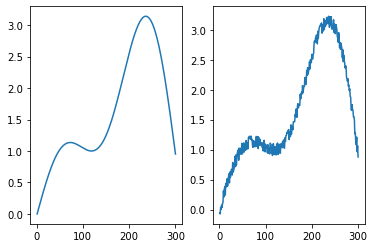

<Figure size 432x288 with 0 Axes>

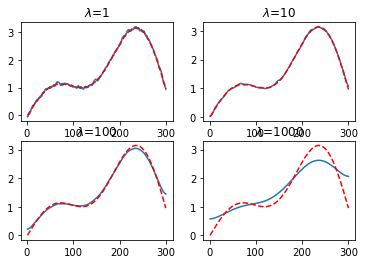

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
t = np.linspace(0, 4, num = 300)
x = np.sin(t) + t * (np.cos(t)**2)
w = np.arange(1, 301)
b = x + 0.1 * np.sin(10 * w**3)
fig = plt.figure()
fig, ax = plt.subplots(1, 2)
ax[0].plot(w, x)
ax[1].plot(w, b)
L= np.zeros((299, 300))
for i in range(299):
    L[i, i] = 1
    L[i, i+1] = -1
I= np.eye(300)
LTL = L.T @ L
x_rls0 = la.solve(I + LTL, b)
x_rls1 = la.solve(I + 10 * LTL, b)
x_rls2 = la.solve(I + 100 * LTL, b)
x_rls3 = la.solve(I + 1000 * LTL, b)
fig= plt.figure()
fig, ax = plt.subplots(2,2)
ax[0][0].plot(w, x_rls0)
ax[0][0].plot(w, x,'r--')
ax[0][0].title.set_text('$\lambda$=1')
ax[0][1].plot(w, x_rls1)
ax[0][1].plot(w, x,'r--')
ax[0][1].title.set_text('$\lambda$=10')
ax[1][0].plot(w, x_rls2)
ax[1][0].plot(w, x,'r--')
ax[1][0].title.set_text('$\lambda$=100')
ax[1][1].plot(w, x_rls3)
ax[1][1].plot(w, x,'r--')
ax[1][1].title.set_text('$\lambda$=1000')

# Example 4.6
### gradient method for quadratic functions with exact line minimization

In [3]:
import numpy as np
import numpy.linalg as la

def gradient_method_quadratic(A, b, x0, epsilon):
    x = x0
    iter = 0
    grad = 2 * (A @ x + b)
    while la.norm(grad)>epsilon:
        iter = iter + 1
        t = la.norm(grad)**2/(2 * grad @ A @ grad)
        x = x - t * grad
        grad = 2 * (A @ x + b)
        fun_val = x @ A @ x + 2 * b @ x
        print('iter_number = {0:2d}'.format(iter),\
              'norm_grad = {0:.4f}'.format(la.norm(grad)),\
              'fun_val = {0:.4f}'.format(fun_val))
    return x, fun_val

A = np.array([[1, 0], [0, 2]])
b = np.array([0, 0])
x0 = np.array([2.0, 1.0])
x, f_val = gradient_method_quadratic(A, b, x0, 1e-5)
print(x)

iter_number =  1 norm_grad = 1.8856 fun_val = 0.6667
iter_number =  2 norm_grad = 0.6285 fun_val = 0.0741
iter_number =  3 norm_grad = 0.2095 fun_val = 0.0082
iter_number =  4 norm_grad = 0.0698 fun_val = 0.0009
iter_number =  5 norm_grad = 0.0233 fun_val = 0.0001
iter_number =  6 norm_grad = 0.0078 fun_val = 0.0000
iter_number =  7 norm_grad = 0.0026 fun_val = 0.0000
iter_number =  8 norm_grad = 0.0009 fun_val = 0.0000
iter_number =  9 norm_grad = 0.0003 fun_val = 0.0000
iter_number = 10 norm_grad = 0.0001 fun_val = 0.0000
iter_number = 11 norm_grad = 0.0000 fun_val = 0.0000
iter_number = 12 norm_grad = 0.0000 fun_val = 0.0000
iter_number = 13 norm_grad = 0.0000 fun_val = 0.0000
[ 1.25445095e-06 -6.27225474e-07]


# Example 4.8
### gradient method with constant stepsize

In [4]:
import numpy as np
import numpy.linalg as la
def gradient_method_constant(f, g, x0, t, epsilon):
    x = x0
    grad = g(x)
    iter = 0
    while la.norm(grad) > epsilon:
        iter = iter + 1
        x = x - t * grad
        fun_val = f(x)
        grad = g(x)
        print('iter_number = {0:3d}'.format(iter),\
              'norm_grad = {0:2.6f}'.format(la.norm(grad)),\
              'fun_val = {0:2.6f}'.format(fun_val))
    return x, fun_val



In [5]:
A = np.array([[1, 0], [0, 2]])
f = lambda x : x @ A @ x
g = lambda x : 2 * A @ x
x0 = np.array([2.0, 1.0])
x, fun_val = gradient_method_constant(f, g, x0, 0.1, 1e-5)

iter_number =   1 norm_grad = 4.000000 fun_val = 3.280000
iter_number =   2 norm_grad = 2.937210 fun_val = 1.897600
iter_number =   3 norm_grad = 2.222791 fun_val = 1.141888
iter_number =   4 norm_grad = 1.718457 fun_val = 0.704681
iter_number =   5 norm_grad = 1.347120 fun_val = 0.441590
iter_number =   6 norm_grad = 1.065054 fun_val = 0.279231
iter_number =   7 norm_grad = 0.846301 fun_val = 0.177489
iter_number =   8 norm_grad = 0.674443 fun_val = 0.113154
iter_number =   9 norm_grad = 0.538382 fun_val = 0.072261
iter_number =  10 norm_grad = 0.430177 fun_val = 0.046190
iter_number =  11 norm_grad = 0.343904 fun_val = 0.029541
iter_number =  12 norm_grad = 0.275016 fun_val = 0.018899
iter_number =  13 norm_grad = 0.219964 fun_val = 0.012093
iter_number =  14 norm_grad = 0.175950 fun_val = 0.007738
iter_number =  15 norm_grad = 0.140750 fun_val = 0.004952
iter_number =  16 norm_grad = 0.112596 fun_val = 0.003169
iter_number =  17 norm_grad = 0.090075 fun_val = 0.002028
iter_number = 

# Example 4.9
### gradient method with backtracking

In [6]:
import numpy as np
import numpy.linalg as la
def gradient_method_backtracking(f, g, x0, s, alpha, beta, epsilon):
    x = x0
    grad = g(x)
    fun_val = f(x)
    iter = 0
    while la.norm(grad) > epsilon:
        iter = iter + 1
        t=s
        while fun_val - f(x - t * grad) < alpha * t * la.norm(grad)**2:
            t=beta*t
        x = x - t * grad
        fun_val = f(x)
        grad = g(x)
        print('iter_number = {0:3d}'.format(iter),\
              'norm_grad = {0:2.6f}'.format(la.norm(grad)),\
                'fun_val = {0:2.6f}'.format(fun_val))
    return x, fun_val

A = np.array([[1, 0], [0, 2]])
f = lambda x : x @ A @ x
g = lambda x : 2 * A @ x
x0 = np.array([2.0, 1.0])
x, fun_val = gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5)

iter_number =   1 norm_grad = 2.000000 fun_val = 1.000000
iter_number =   2 norm_grad = 0.000000 fun_val = 0.000000


In [7]:
A = np.array([[1, 0], [0, 0.01]])
x0 = np.array([0.01, 1.0])
x, fun_val = gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5)

iter_number =   1 norm_grad = 0.028003 fun_val = 0.009704
iter_number =   2 norm_grad = 0.027730 fun_val = 0.009324
iter_number =   3 norm_grad = 0.027465 fun_val = 0.008958
iter_number =   4 norm_grad = 0.027209 fun_val = 0.008608
iter_number =   5 norm_grad = 0.026960 fun_val = 0.008271
iter_number =   6 norm_grad = 0.026719 fun_val = 0.007947
iter_number =   7 norm_grad = 0.026485 fun_val = 0.007636
iter_number =   8 norm_grad = 0.026259 fun_val = 0.007338
iter_number =   9 norm_grad = 0.026039 fun_val = 0.007051
iter_number =  10 norm_grad = 0.025827 fun_val = 0.006776
iter_number =  11 norm_grad = 0.025622 fun_val = 0.006512
iter_number =  12 norm_grad = 0.025423 fun_val = 0.006258
iter_number =  13 norm_grad = 0.025230 fun_val = 0.006014
iter_number =  14 norm_grad = 0.025044 fun_val = 0.005780
iter_number =  15 norm_grad = 0.024864 fun_val = 0.005555
iter_number =  16 norm_grad = 0.024689 fun_val = 0.005339
iter_number =  17 norm_grad = 0.024521 fun_val = 0.005131
iter_number = 

# Example 4.13
### Rosenbrock function 

In [8]:
import numpy as np
A=np.array([[802, -400], [-400, 200]])
print(np.linalg.cond(A))


2508.009601277298


In [9]:
import numpy as np
import numpy.linalg as la
f = lambda x : 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
g = lambda x : np.array([-400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0]),\
                          200 * (x[1] - x[0]**2)])
x0 = np.array([2.0, 5.0])
x, fun_val = gradient_method_backtracking(f, g, x0, 2, 0.25, 0.5, 1e-5)


iter_number =   1 norm_grad = 118.254478 fun_val = 3.221022
iter_number =   2 norm_grad = 0.723051 fun_val = 1.496586
iter_number =   3 norm_grad = 0.732370 fun_val = 1.496447
iter_number =   4 norm_grad = 0.742064 fun_val = 1.496308
iter_number =   5 norm_grad = 0.752149 fun_val = 1.496169
iter_number =   6 norm_grad = 0.762628 fun_val = 1.496030
iter_number =   7 norm_grad = 0.773516 fun_val = 1.495892
iter_number =   8 norm_grad = 0.784818 fun_val = 1.495753
iter_number =   9 norm_grad = 0.796550 fun_val = 1.495615
iter_number =  10 norm_grad = 0.808713 fun_val = 1.495476
iter_number =  11 norm_grad = 0.821325 fun_val = 1.495338
iter_number =  12 norm_grad = 0.834388 fun_val = 1.495200
iter_number =  13 norm_grad = 0.847920 fun_val = 1.495062
iter_number =  14 norm_grad = 0.861919 fun_val = 1.494925
iter_number =  15 norm_grad = 0.876408 fun_val = 1.494787
iter_number =  16 norm_grad = 0.891382 fun_val = 1.494650
iter_number =  17 norm_grad = 0.906864 fun_val = 1.494512
iter_number 

iter_number = 367 norm_grad = 0.541017 fun_val = 0.894813
iter_number = 368 norm_grad = 0.742471 fun_val = 0.894636
iter_number = 369 norm_grad = 0.575477 fun_val = 0.894494
iter_number = 370 norm_grad = 0.854141 fun_val = 0.894340
iter_number = 371 norm_grad = 0.624709 fun_val = 0.894179
iter_number = 372 norm_grad = 1.001566 fun_val = 0.894057
iter_number = 373 norm_grad = 0.693432 fun_val = 0.893868
iter_number = 374 norm_grad = 0.554580 fun_val = 0.893733
iter_number = 375 norm_grad = 0.787546 fun_val = 0.893566
iter_number = 376 norm_grad = 0.594718 fun_val = 0.893416
iter_number = 377 norm_grad = 0.913109 fun_val = 0.893274
iter_number = 378 norm_grad = 0.651399 fun_val = 0.893103
iter_number = 379 norm_grad = 0.537169 fun_val = 0.892974
iter_number = 380 norm_grad = 1.451960 fun_val = 0.892824
iter_number = 381 norm_grad = 0.919137 fun_val = 0.892520
iter_number = 382 norm_grad = 0.653817 fun_val = 0.892347
iter_number = 383 norm_grad = 0.537943 fun_val = 0.892217
iter_number = 

iter_number = 523 norm_grad = 0.606944 fun_val = 0.869593
iter_number = 524 norm_grad = 0.942636 fun_val = 0.869462
iter_number = 525 norm_grad = 0.652341 fun_val = 0.869283
iter_number = 526 norm_grad = 0.531327 fun_val = 0.869154
iter_number = 527 norm_grad = 1.403948 fun_val = 0.868993
iter_number = 528 norm_grad = 0.871807 fun_val = 0.868696
iter_number = 529 norm_grad = 0.620774 fun_val = 0.868531
iter_number = 530 norm_grad = 0.981640 fun_val = 0.868409
iter_number = 531 norm_grad = 0.669291 fun_val = 0.868222
iter_number = 532 norm_grad = 0.537515 fun_val = 0.868090
iter_number = 533 norm_grad = 0.730805 fun_val = 0.867916
iter_number = 534 norm_grad = 0.561588 fun_val = 0.867775
iter_number = 535 norm_grad = 0.807407 fun_val = 0.867615
iter_number = 536 norm_grad = 0.592925 fun_val = 0.867462
iter_number = 537 norm_grad = 0.901605 fun_val = 0.867321
iter_number = 538 norm_grad = 0.633212 fun_val = 0.867150
iter_number = 539 norm_grad = 1.016145 fun_val = 0.867037
iter_number = 

iter_number = 1031 norm_grad = 0.544032 fun_val = 0.788574
iter_number = 1032 norm_grad = 0.746163 fun_val = 0.788415
iter_number = 1033 norm_grad = 0.539104 fun_val = 0.788271
iter_number = 1034 norm_grad = 0.731984 fun_val = 0.788109
iter_number = 1035 norm_grad = 0.534312 fun_val = 0.787967
iter_number = 1036 norm_grad = 0.718068 fun_val = 0.787803
iter_number = 1037 norm_grad = 0.529663 fun_val = 0.787664
iter_number = 1038 norm_grad = 0.704440 fun_val = 0.787497
iter_number = 1039 norm_grad = 0.525163 fun_val = 0.787360
iter_number = 1040 norm_grad = 1.381212 fun_val = 0.787225
iter_number = 1041 norm_grad = 0.782637 fun_val = 0.786912
iter_number = 1042 norm_grad = 0.550849 fun_val = 0.786760
iter_number = 1043 norm_grad = 0.765383 fun_val = 0.786605
iter_number = 1044 norm_grad = 0.544907 fun_val = 0.786457
iter_number = 1045 norm_grad = 0.748532 fun_val = 0.786299
iter_number = 1046 norm_grad = 0.539177 fun_val = 0.786154
iter_number = 1047 norm_grad = 0.732109 fun_val = 0.7859

iter_number = 1533 norm_grad = 0.666971 fun_val = 0.699595
iter_number = 1534 norm_grad = 0.486254 fun_val = 0.699465
iter_number = 1535 norm_grad = 1.065695 fun_val = 0.699243
iter_number = 1536 norm_grad = 0.596016 fun_val = 0.699014
iter_number = 1537 norm_grad = 0.857878 fun_val = 0.698891
iter_number = 1538 norm_grad = 0.535030 fun_val = 0.698719
iter_number = 1539 norm_grad = 0.710669 fun_val = 0.698569
iter_number = 1540 norm_grad = 0.496444 fun_val = 0.698430
iter_number = 1541 norm_grad = 1.163998 fun_val = 0.698244
iter_number = 1542 norm_grad = 0.626094 fun_val = 0.697984
iter_number = 1543 norm_grad = 0.926321 fun_val = 0.697876
iter_number = 1544 norm_grad = 0.553742 fun_val = 0.697687
iter_number = 1545 norm_grad = 0.756863 fun_val = 0.697545
iter_number = 1546 norm_grad = 0.507623 fun_val = 0.697396
iter_number = 1547 norm_grad = 1.264769 fun_val = 0.697252
iter_number = 1548 norm_grad = 0.657879 fun_val = 0.696956
iter_number = 1549 norm_grad = 0.483246 fun_val = 0.6968

iter_number = 2196 norm_grad = 0.869114 fun_val = 0.580100
iter_number = 2197 norm_grad = 0.478310 fun_val = 0.579918
iter_number = 2198 norm_grad = 1.084674 fun_val = 0.579757
iter_number = 2199 norm_grad = 0.518511 fun_val = 0.579503
iter_number = 2200 norm_grad = 0.651500 fun_val = 0.579363
iter_number = 2201 norm_grad = 0.443655 fun_val = 0.579237
iter_number = 2202 norm_grad = 1.526096 fun_val = 0.578960
iter_number = 2203 norm_grad = 0.614487 fun_val = 0.578511
iter_number = 2204 norm_grad = 0.841681 fun_val = 0.578404
iter_number = 2205 norm_grad = 0.472758 fun_val = 0.578230
iter_number = 2206 norm_grad = 1.041265 fun_val = 0.578053
iter_number = 2207 norm_grad = 0.508821 fun_val = 0.577815
iter_number = 2208 norm_grad = 0.630876 fun_val = 0.577672
iter_number = 2209 norm_grad = 0.872487 fun_val = 0.577572
iter_number = 2210 norm_grad = 0.477751 fun_val = 0.577388
iter_number = 2211 norm_grad = 1.082337 fun_val = 0.577228
iter_number = 2212 norm_grad = 0.516593 fun_val = 0.5769

iter_number = 2703 norm_grad = 0.454907 fun_val = 0.479620
iter_number = 2704 norm_grad = 0.972746 fun_val = 0.479468
iter_number = 2705 norm_grad = 0.436943 fun_val = 0.479241
iter_number = 2706 norm_grad = 0.841141 fun_val = 0.479045
iter_number = 2707 norm_grad = 0.423793 fun_val = 0.478864
iter_number = 2708 norm_grad = 1.455602 fun_val = 0.478653
iter_number = 2709 norm_grad = 0.494581 fun_val = 0.478201
iter_number = 2710 norm_grad = 0.582973 fun_val = 0.478070
iter_number = 2711 norm_grad = 0.731339 fun_val = 0.477959
iter_number = 2712 norm_grad = 0.413818 fun_val = 0.477811
iter_number = 2713 norm_grad = 1.224447 fun_val = 0.477479
iter_number = 2714 norm_grad = 0.464319 fun_val = 0.477146
iter_number = 2715 norm_grad = 1.038742 fun_val = 0.477020
iter_number = 2716 norm_grad = 0.442649 fun_val = 0.476767
iter_number = 2717 norm_grad = 0.887079 fun_val = 0.476587
iter_number = 2718 norm_grad = 0.426983 fun_val = 0.476390
iter_number = 2719 norm_grad = 0.764821 fun_val = 0.4761

iter_number = 2846 norm_grad = 0.411368 fun_val = 0.444523
iter_number = 2847 norm_grad = 1.325862 fun_val = 0.444278
iter_number = 2848 norm_grad = 0.447752 fun_val = 0.443885
iter_number = 2849 norm_grad = 0.946639 fun_val = 0.443742
iter_number = 2850 norm_grad = 0.414078 fun_val = 0.443521
iter_number = 2851 norm_grad = 1.389157 fun_val = 0.443312
iter_number = 2852 norm_grad = 0.453215 fun_val = 0.442884
iter_number = 2853 norm_grad = 0.982646 fun_val = 0.442756
iter_number = 2854 norm_grad = 0.416271 fun_val = 0.442520
iter_number = 2855 norm_grad = 1.439177 fun_val = 0.442341
iter_number = 2856 norm_grad = 0.457396 fun_val = 0.441885
iter_number = 2857 norm_grad = 1.009622 fun_val = 0.441767
iter_number = 2858 norm_grad = 0.417782 fun_val = 0.441521
iter_number = 2859 norm_grad = 0.734599 fun_val = 0.441311
iter_number = 2860 norm_grad = 0.398478 fun_val = 0.441161
iter_number = 2861 norm_grad = 1.026600 fun_val = 0.440776
iter_number = 2862 norm_grad = 0.418506 fun_val = 0.4405

iter_number = 3354 norm_grad = 0.353574 fun_val = 0.191759
iter_number = 3355 norm_grad = 0.611424 fun_val = 0.191665
iter_number = 3356 norm_grad = 0.523559 fun_val = 0.191557
iter_number = 3357 norm_grad = 0.456518 fun_val = 0.191459
iter_number = 3358 norm_grad = 0.406464 fun_val = 0.191367
iter_number = 3359 norm_grad = 0.369846 fun_val = 0.191279
iter_number = 3360 norm_grad = 0.674265 fun_val = 0.191203
iter_number = 3361 norm_grad = 0.571255 fun_val = 0.191088
iter_number = 3362 norm_grad = 0.492175 fun_val = 0.190985
iter_number = 3363 norm_grad = 0.432468 fun_val = 0.190889
iter_number = 3364 norm_grad = 0.388409 fun_val = 0.190799
iter_number = 3365 norm_grad = 0.356574 fun_val = 0.190712
iter_number = 3366 norm_grad = 0.623601 fun_val = 0.190622
iter_number = 3367 norm_grad = 0.531477 fun_val = 0.190513
iter_number = 3368 norm_grad = 0.461477 fun_val = 0.190414
iter_number = 3369 norm_grad = 0.409264 fun_val = 0.190321
iter_number = 3370 norm_grad = 0.371235 fun_val = 0.1902

iter_number = 3896 norm_grad = 0.561844 fun_val = 0.142778
iter_number = 3897 norm_grad = 0.425771 fun_val = 0.142674
iter_number = 3898 norm_grad = 0.345432 fun_val = 0.142591
iter_number = 3899 norm_grad = 0.600713 fun_val = 0.142532
iter_number = 3900 norm_grad = 0.449320 fun_val = 0.142421
iter_number = 3901 norm_grad = 0.358611 fun_val = 0.142335
iter_number = 3902 norm_grad = 0.308045 fun_val = 0.142260
iter_number = 3903 norm_grad = 0.474657 fun_val = 0.142169
iter_number = 3904 norm_grad = 0.373104 fun_val = 0.142079
iter_number = 3905 norm_grad = 0.315642 fun_val = 0.142003
iter_number = 3906 norm_grad = 0.501630 fun_val = 0.141918
iter_number = 3907 norm_grad = 0.388589 fun_val = 0.141825
iter_number = 3908 norm_grad = 0.323920 fun_val = 0.141747
iter_number = 3909 norm_grad = 0.530356 fun_val = 0.141669
iter_number = 3910 norm_grad = 0.405443 fun_val = 0.141571
iter_number = 3911 norm_grad = 0.332986 fun_val = 0.141491
iter_number = 3912 norm_grad = 0.560472 fun_val = 0.1414

iter_number = 4532 norm_grad = 0.301694 fun_val = 0.093002
iter_number = 4533 norm_grad = 0.480330 fun_val = 0.092954
iter_number = 4534 norm_grad = 0.313524 fun_val = 0.092865
iter_number = 4535 norm_grad = 0.248096 fun_val = 0.092807
iter_number = 4536 norm_grad = 0.642623 fun_val = 0.092734
iter_number = 4537 norm_grad = 0.384975 fun_val = 0.092603
iter_number = 4538 norm_grad = 0.274242 fun_val = 0.092533
iter_number = 4539 norm_grad = 0.405338 fun_val = 0.092469
iter_number = 4540 norm_grad = 0.282053 fun_val = 0.092396
iter_number = 4541 norm_grad = 0.427348 fun_val = 0.092337
iter_number = 4542 norm_grad = 0.290686 fun_val = 0.092259
iter_number = 4543 norm_grad = 0.451037 fun_val = 0.092205
iter_number = 4544 norm_grad = 0.300179 fun_val = 0.092122
iter_number = 4545 norm_grad = 0.476435 fun_val = 0.092074
iter_number = 4546 norm_grad = 0.310563 fun_val = 0.091986
iter_number = 4547 norm_grad = 0.246229 fun_val = 0.091929
iter_number = 4548 norm_grad = 0.629540 fun_val = 0.0918

iter_number = 4698 norm_grad = 0.240464 fun_val = 0.081774
iter_number = 4699 norm_grad = 0.317991 fun_val = 0.081705
iter_number = 4700 norm_grad = 0.238189 fun_val = 0.081648
iter_number = 4701 norm_grad = 0.618798 fun_val = 0.081588
iter_number = 4702 norm_grad = 0.351568 fun_val = 0.081461
iter_number = 4703 norm_grad = 0.248834 fun_val = 0.081399
iter_number = 4704 norm_grad = 0.342548 fun_val = 0.081334
iter_number = 4705 norm_grad = 0.245686 fun_val = 0.081273
iter_number = 4706 norm_grad = 0.333724 fun_val = 0.081207
iter_number = 4707 norm_grad = 0.242652 fun_val = 0.081148
iter_number = 4708 norm_grad = 0.325122 fun_val = 0.081080
iter_number = 4709 norm_grad = 0.239737 fun_val = 0.081023
iter_number = 4710 norm_grad = 0.316766 fun_val = 0.080953
iter_number = 4711 norm_grad = 0.236947 fun_val = 0.080897
iter_number = 4712 norm_grad = 0.611548 fun_val = 0.080836
iter_number = 4713 norm_grad = 0.346712 fun_val = 0.080711
iter_number = 4714 norm_grad = 0.246360 fun_val = 0.0806

iter_number = 5198 norm_grad = 0.420727 fun_val = 0.049694
iter_number = 5199 norm_grad = 0.219381 fun_val = 0.049620
iter_number = 5200 norm_grad = 0.295489 fun_val = 0.049579
iter_number = 5201 norm_grad = 0.190193 fun_val = 0.049533
iter_number = 5202 norm_grad = 0.428109 fun_val = 0.049475
iter_number = 5203 norm_grad = 0.220815 fun_val = 0.049399
iter_number = 5204 norm_grad = 0.298794 fun_val = 0.049358
iter_number = 5205 norm_grad = 0.190522 fun_val = 0.049312
iter_number = 5206 norm_grad = 0.433019 fun_val = 0.049256
iter_number = 5207 norm_grad = 0.221619 fun_val = 0.049179
iter_number = 5208 norm_grad = 0.300687 fun_val = 0.049138
iter_number = 5209 norm_grad = 0.190560 fun_val = 0.049091
iter_number = 5210 norm_grad = 0.435335 fun_val = 0.049036
iter_number = 5211 norm_grad = 0.221756 fun_val = 0.048959
iter_number = 5212 norm_grad = 0.301108 fun_val = 0.048919
iter_number = 5213 norm_grad = 0.190292 fun_val = 0.048872
iter_number = 5214 norm_grad = 0.434997 fun_val = 0.0488

iter_number = 5364 norm_grad = 0.273505 fun_val = 0.040856
iter_number = 5365 norm_grad = 0.171528 fun_val = 0.040816
iter_number = 5366 norm_grad = 0.350965 fun_val = 0.040756
iter_number = 5367 norm_grad = 0.185597 fun_val = 0.040700
iter_number = 5368 norm_grad = 0.228895 fun_val = 0.040660
iter_number = 5369 norm_grad = 0.318170 fun_val = 0.040631
iter_number = 5370 norm_grad = 0.179090 fun_val = 0.040582
iter_number = 5371 norm_grad = 0.417265 fun_val = 0.040541
iter_number = 5372 norm_grad = 0.199115 fun_val = 0.040468
iter_number = 5373 norm_grad = 0.258151 fun_val = 0.040431
iter_number = 5374 norm_grad = 0.168290 fun_val = 0.040394
iter_number = 5375 norm_grad = 0.326120 fun_val = 0.040330
iter_number = 5376 norm_grad = 0.180000 fun_val = 0.040279
iter_number = 5377 norm_grad = 0.427090 fun_val = 0.040242
iter_number = 5378 norm_grad = 0.200591 fun_val = 0.040166
iter_number = 5379 norm_grad = 0.261442 fun_val = 0.040130
iter_number = 5380 norm_grad = 0.168294 fun_val = 0.0400

iter_number = 5864 norm_grad = 0.596580 fun_val = 0.018990
iter_number = 5865 norm_grad = 0.163920 fun_val = 0.018845
iter_number = 5866 norm_grad = 0.203758 fun_val = 0.018827
iter_number = 5867 norm_grad = 0.115866 fun_val = 0.018804
iter_number = 5868 norm_grad = 0.325384 fun_val = 0.018746
iter_number = 5869 norm_grad = 0.126829 fun_val = 0.018698
iter_number = 5870 norm_grad = 0.264939 fun_val = 0.018673
iter_number = 5871 norm_grad = 0.120545 fun_val = 0.018639
iter_number = 5872 norm_grad = 0.218909 fun_val = 0.018605
iter_number = 5873 norm_grad = 0.116411 fun_val = 0.018579
iter_number = 5874 norm_grad = 0.353119 fun_val = 0.018530
iter_number = 5875 norm_grad = 0.129191 fun_val = 0.018475
iter_number = 5876 norm_grad = 0.283895 fun_val = 0.018454
iter_number = 5877 norm_grad = 0.121676 fun_val = 0.018416
iter_number = 5878 norm_grad = 0.231437 fun_val = 0.018385
iter_number = 5879 norm_grad = 0.116791 fun_val = 0.018357
iter_number = 5880 norm_grad = 0.374822 fun_val = 0.0183

iter_number = 6031 norm_grad = 0.396316 fun_val = 0.012552
iter_number = 6032 norm_grad = 0.110997 fun_val = 0.012483
iter_number = 6033 norm_grad = 0.246394 fun_val = 0.012471
iter_number = 6034 norm_grad = 0.098693 fun_val = 0.012441
iter_number = 6035 norm_grad = 0.320971 fun_val = 0.012415
iter_number = 6036 norm_grad = 0.103891 fun_val = 0.012368
iter_number = 6037 norm_grad = 0.202933 fun_val = 0.012349
iter_number = 6038 norm_grad = 0.095648 fun_val = 0.012327
iter_number = 6039 norm_grad = 0.258777 fun_val = 0.012287
iter_number = 6040 norm_grad = 0.098819 fun_val = 0.012255
iter_number = 6041 norm_grad = 0.335047 fun_val = 0.012233
iter_number = 6042 norm_grad = 0.104282 fun_val = 0.012183
iter_number = 6043 norm_grad = 0.208710 fun_val = 0.012164
iter_number = 6044 norm_grad = 0.095302 fun_val = 0.012142
iter_number = 6045 norm_grad = 0.264577 fun_val = 0.012104
iter_number = 6046 norm_grad = 0.098510 fun_val = 0.012070
iter_number = 6047 norm_grad = 0.169883 fun_val = 0.0120

iter_number = 6531 norm_grad = 0.043593 fun_val = 0.000004
iter_number = 6532 norm_grad = 0.001748 fun_val = 0.000003
iter_number = 6533 norm_grad = 0.002880 fun_val = 0.000003
iter_number = 6534 norm_grad = 0.002800 fun_val = 0.000003
iter_number = 6535 norm_grad = 0.002725 fun_val = 0.000003
iter_number = 6536 norm_grad = 0.002653 fun_val = 0.000003
iter_number = 6537 norm_grad = 0.002585 fun_val = 0.000003
iter_number = 6538 norm_grad = 0.002520 fun_val = 0.000003
iter_number = 6539 norm_grad = 0.002458 fun_val = 0.000003
iter_number = 6540 norm_grad = 0.002400 fun_val = 0.000003
iter_number = 6541 norm_grad = 0.002345 fun_val = 0.000003
iter_number = 6542 norm_grad = 0.002292 fun_val = 0.000003
iter_number = 6543 norm_grad = 0.002243 fun_val = 0.000003
iter_number = 6544 norm_grad = 0.002196 fun_val = 0.000003
iter_number = 6545 norm_grad = 0.002152 fun_val = 0.000003
iter_number = 6546 norm_grad = 0.002110 fun_val = 0.000003
iter_number = 6547 norm_grad = 0.002070 fun_val = 0.0000

# Example 4.14
### sensitivity of the solution of a linear system to the RHS vector

In [10]:
import numpy as np
import numpy.linalg as la
A = np.array([[1 + 1e-5, 1], [1, 1 + 1e-5]])
print(la.cond(A))

200000.99999987945


In [11]:
print(la.solve(A, np.array([1, 1])))

[0.4999975 0.4999975]


In [12]:
print(la.solve(A, np.array([1.1, 1])))


[ 5000.52499734 -4999.47500259]


# Example 4.15 
### scaled gradient

In [13]:
import numpy as np
import numpy.linalg as la
A = np.array([[1000, 20], [20, 1]])
b = np.array([0, 0])
x0 = np.array([1.0, 1000.0])
x, f_val = gradient_method_quadratic(A, b, x0, 1e-5)

iter_number =  1 norm_grad = 1199.0240 fun_val = 598776.9650
iter_number =  2 norm_grad = 24186.6284 fun_val = 344412.9239
iter_number =  3 norm_grad = 689.6714 fun_val = 198104.2510
iter_number =  4 norm_grad = 13912.0038 fun_val = 113948.3786
iter_number =  5 norm_grad = 396.6949 fun_val = 65542.4249
iter_number =  6 norm_grad = 8002.1013 fun_val = 37699.6102
iter_number =  7 norm_grad = 228.1765 fun_val = 21684.5900
iter_number =  8 norm_grad = 4602.7607 fun_val = 12472.8463
iter_number =  9 norm_grad = 131.2458 fun_val = 7174.3065
iter_number = 10 norm_grad = 2647.4804 fun_val = 4126.6181
iter_number = 11 norm_grad = 75.4918 fun_val = 2373.6060
iter_number = 12 norm_grad = 1522.8149 fun_val = 1365.2840
iter_number = 13 norm_grad = 43.4224 fun_val = 785.3032
iter_number = 14 norm_grad = 875.9140 fun_val = 451.7017
iter_number = 15 norm_grad = 24.9763 fun_val = 259.8161
iter_number = 16 norm_grad = 503.8205 fun_val = 149.4447
iter_number = 17 norm_grad = 14.3662 fun_val = 85.9597
ite

In [14]:
print(la.cond(A))

1668.0010671466664


In [15]:
D = np.diag(1 / np.diag(A))
A_cond = np.sqrt(D) @ A @ np.sqrt(D)
print(A_cond)
print(la.cond(A_cond))


[[1.         0.63245553]
 [0.63245553 1.        ]]
4.441518440112253


In [16]:
def gradient_scaled_quadratic(A, b, D, x0, epsilon):
    x = x0
    iter = 0
    grad = 2 * (A @ x + b)
    while la.norm(grad)>epsilon:
        iter = iter + 1
        t = grad @ D @ grad/(2 * (grad @ D.T) @ A @ (D @ grad))
        x = x - t * D @ grad
        grad = 2 * (A @ x + b)
        fun_val = x @ A @ x + 2 * b @ x
        print('iter_number = {0:2d}'.format(iter),\
              'norm_grad = {0:.4f}'.format(la.norm(grad)),\
              'fun_val = {0:.4f}'.format(fun_val))
    return x, fun_val

x, f_val = gradient_scaled_quadratic(A, b, D, x0, 1e-5)
print(x)


iter_number =  1 norm_grad = 10461.3388 fun_val = 102437.8753
iter_number =  2 norm_grad = 4137.8125 fun_val = 10080.2289
iter_number =  3 norm_grad = 1029.4307 fun_val = 991.9282
iter_number =  4 norm_grad = 407.1746 fun_val = 97.6090
iter_number =  5 norm_grad = 101.2994 fun_val = 9.6051
iter_number =  6 norm_grad = 40.0673 fun_val = 0.9452
iter_number =  7 norm_grad = 9.9682 fun_val = 0.0930
iter_number =  8 norm_grad = 3.9428 fun_val = 0.0092
iter_number =  9 norm_grad = 0.9809 fun_val = 0.0009
iter_number = 10 norm_grad = 0.3880 fun_val = 0.0001
iter_number = 11 norm_grad = 0.0965 fun_val = 0.0000
iter_number = 12 norm_grad = 0.0382 fun_val = 0.0000
iter_number = 13 norm_grad = 0.0095 fun_val = 0.0000
iter_number = 14 norm_grad = 0.0038 fun_val = 0.0000
iter_number = 15 norm_grad = 0.0009 fun_val = 0.0000
iter_number = 16 norm_grad = 0.0004 fun_val = 0.0000
iter_number = 17 norm_grad = 0.0001 fun_val = 0.0000
iter_number = 18 norm_grad = 0.0000 fun_val = 0.0000
iter_number = 19 no

# Section 5.1
### pure Newton's method

In [17]:
import numpy as np
import numpy.linalg as la
def pure_netwon(f, g, h, x0, epsilon):
    x = x0
    gval = g(x)
    hval = h(x)
    iter = 0
    while la.norm(gval) > epsilon and iter < 10000:
        iter = iter + 1
        x = x - la.solve(hval, gval)
        fun_val = f(x)
        gval = g(x)
        hval = h(x)
        print('iter = {0:3d}'.format(iter),\
              'f(x) = {0:2.6f}'.format(fun_val))
        if (iter==10000):
            print('did not converge')
    return x

# Example 5.3 

In [18]:
import numpy as np
import numpy.linalg as la
f = lambda x : 100 * x[0]**4 + 0.01 * x[1]**4
g = lambda x : np.array([400 * x[0]**3, 0.04 * x[1]**3])
x0 = np.array([1.0, 1.0])
epsilon = 1e-6
x, fun_val = gradient_method_backtracking(f, g, x0, 1, 0.5, 0.5, epsilon)

iter_number =   1 norm_grad = 90.513620 fun_val = 13.799181
iter_number =   2 norm_grad = 32.381098 fun_val = 3.511932
iter_number =   3 norm_grad = 11.472585 fun_val = 0.887929
iter_number =   4 norm_grad = 4.057815 fun_val = 0.229568
iter_number =   5 norm_grad = 1.435228 fun_val = 0.064854
iter_number =   6 norm_grad = 0.508791 fun_val = 0.023628
iter_number =   7 norm_grad = 0.183616 fun_val = 0.013235
iter_number =   8 norm_grad = 0.074349 fun_val = 0.010469
iter_number =   9 norm_grad = 0.036865 fun_val = 0.008905
iter_number =  10 norm_grad = 0.032686 fun_val = 0.007625
iter_number =  11 norm_grad = 0.029348 fun_val = 0.006612
iter_number =  12 norm_grad = 0.026566 fun_val = 0.005792
iter_number =  13 norm_grad = 0.024208 fun_val = 0.005118
iter_number =  14 norm_grad = 0.022186 fun_val = 0.004556
iter_number =  15 norm_grad = 0.020436 fun_val = 0.004084
iter_number =  16 norm_grad = 0.018907 fun_val = 0.003682
iter_number =  17 norm_grad = 0.017563 fun_val = 0.003337
iter_numbe

iter_number = 532 norm_grad = 0.000141 fun_val = 0.000005
iter_number = 533 norm_grad = 0.000141 fun_val = 0.000005
iter_number = 534 norm_grad = 0.000140 fun_val = 0.000005
iter_number = 535 norm_grad = 0.000140 fun_val = 0.000005
iter_number = 536 norm_grad = 0.000140 fun_val = 0.000005
iter_number = 537 norm_grad = 0.000139 fun_val = 0.000005
iter_number = 538 norm_grad = 0.000139 fun_val = 0.000005
iter_number = 539 norm_grad = 0.000139 fun_val = 0.000005
iter_number = 540 norm_grad = 0.000138 fun_val = 0.000005
iter_number = 541 norm_grad = 0.000138 fun_val = 0.000005
iter_number = 542 norm_grad = 0.000137 fun_val = 0.000005
iter_number = 543 norm_grad = 0.000137 fun_val = 0.000005
iter_number = 544 norm_grad = 0.000137 fun_val = 0.000005
iter_number = 545 norm_grad = 0.000136 fun_val = 0.000005
iter_number = 546 norm_grad = 0.000136 fun_val = 0.000005
iter_number = 547 norm_grad = 0.000136 fun_val = 0.000005
iter_number = 548 norm_grad = 0.000135 fun_val = 0.000005
iter_number = 

iter_number = 692 norm_grad = 0.000096 fun_val = 0.000003
iter_number = 693 norm_grad = 0.000095 fun_val = 0.000003
iter_number = 694 norm_grad = 0.000095 fun_val = 0.000003
iter_number = 695 norm_grad = 0.000095 fun_val = 0.000003
iter_number = 696 norm_grad = 0.000095 fun_val = 0.000003
iter_number = 697 norm_grad = 0.000095 fun_val = 0.000003
iter_number = 698 norm_grad = 0.000094 fun_val = 0.000003
iter_number = 699 norm_grad = 0.000094 fun_val = 0.000003
iter_number = 700 norm_grad = 0.000094 fun_val = 0.000003
iter_number = 701 norm_grad = 0.000094 fun_val = 0.000003
iter_number = 702 norm_grad = 0.000094 fun_val = 0.000003
iter_number = 703 norm_grad = 0.000093 fun_val = 0.000003
iter_number = 704 norm_grad = 0.000093 fun_val = 0.000003
iter_number = 705 norm_grad = 0.000093 fun_val = 0.000003
iter_number = 706 norm_grad = 0.000093 fun_val = 0.000003
iter_number = 707 norm_grad = 0.000093 fun_val = 0.000003
iter_number = 708 norm_grad = 0.000092 fun_val = 0.000003
iter_number = 

iter_number = 864 norm_grad = 0.000069 fun_val = 0.000002
iter_number = 865 norm_grad = 0.000069 fun_val = 0.000002
iter_number = 866 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 867 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 868 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 869 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 870 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 871 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 872 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 873 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 874 norm_grad = 0.000068 fun_val = 0.000002
iter_number = 875 norm_grad = 0.000067 fun_val = 0.000002
iter_number = 876 norm_grad = 0.000067 fun_val = 0.000002
iter_number = 877 norm_grad = 0.000067 fun_val = 0.000002
iter_number = 878 norm_grad = 0.000067 fun_val = 0.000002
iter_number = 879 norm_grad = 0.000067 fun_val = 0.000002
iter_number = 880 norm_grad = 0.000067 fun_val = 0.000002
iter_number = 

iter_number = 1343 norm_grad = 0.000036 fun_val = 0.000001
iter_number = 1344 norm_grad = 0.000036 fun_val = 0.000001
iter_number = 1345 norm_grad = 0.000036 fun_val = 0.000001
iter_number = 1346 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1347 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1348 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1349 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1350 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1351 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1352 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1353 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1354 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1355 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1356 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1357 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1358 norm_grad = 0.000035 fun_val = 0.000001
iter_number = 1359 norm_grad = 0.000035 fun_val = 0.0000

iter_number = 1530 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1531 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1532 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1533 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1534 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1535 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1536 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1537 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1538 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1539 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1540 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1541 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1542 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1543 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1544 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1545 norm_grad = 0.000029 fun_val = 0.000001
iter_number = 1546 norm_grad = 0.000029 fun_val = 0.0000

iter_number = 1697 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1698 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1699 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1700 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1701 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1702 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1703 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1704 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1705 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1706 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1707 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1708 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1709 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1710 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1711 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1712 norm_grad = 0.000025 fun_val = 0.000001
iter_number = 1713 norm_grad = 0.000025 fun_val = 0.0000

iter_number = 2087 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2088 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2089 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2090 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2091 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2092 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2093 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2094 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2095 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2096 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2097 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2098 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2099 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2100 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2101 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2102 norm_grad = 0.000018 fun_val = 0.000000
iter_number = 2103 norm_grad = 0.000018 fun_val = 0.0000

iter_number = 2363 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2364 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2365 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2366 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2367 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2368 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2369 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2370 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2371 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2372 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2373 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2374 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2375 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2376 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2377 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2378 norm_grad = 0.000015 fun_val = 0.000000
iter_number = 2379 norm_grad = 0.000015 fun_val = 0.0000

iter_number = 2529 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2530 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2531 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2532 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2533 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2534 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2535 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2536 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2537 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2538 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2539 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2540 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2541 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2542 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2543 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2544 norm_grad = 0.000014 fun_val = 0.000000
iter_number = 2545 norm_grad = 0.000014 fun_val = 0.0000

iter_number = 2904 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2905 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2906 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2907 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2908 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2909 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2910 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2911 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2912 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2913 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2914 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2915 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2916 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2917 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2918 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2919 norm_grad = 0.000011 fun_val = 0.000000
iter_number = 2920 norm_grad = 0.000011 fun_val = 0.0000

iter_number = 3195 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3196 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3197 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3198 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3199 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3200 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3201 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3202 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3203 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3204 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3205 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3206 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3207 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3208 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3209 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3210 norm_grad = 0.000010 fun_val = 0.000000
iter_number = 3211 norm_grad = 0.000010 fun_val = 0.0000

iter_number = 3361 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3362 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3363 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3364 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3365 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3366 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3367 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3368 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3369 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3370 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3371 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3372 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3373 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3374 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3375 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3376 norm_grad = 0.000009 fun_val = 0.000000
iter_number = 3377 norm_grad = 0.000009 fun_val = 0.0000

iter_number = 3695 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3696 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3697 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3698 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3699 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3700 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3701 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3702 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3703 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3704 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3705 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3706 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3707 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3708 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3709 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3710 norm_grad = 0.000008 fun_val = 0.000000
iter_number = 3711 norm_grad = 0.000008 fun_val = 0.0000

iter_number = 3835 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3836 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3837 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3838 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3839 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3840 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3841 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3842 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3843 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3844 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3845 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3846 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3847 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3848 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3849 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3850 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 3851 norm_grad = 0.000007 fun_val = 0.0000

iter_number = 4028 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4029 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4030 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4031 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4032 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4033 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4034 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4035 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4036 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4037 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4038 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4039 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4040 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4041 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4042 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4043 norm_grad = 0.000007 fun_val = 0.000000
iter_number = 4044 norm_grad = 0.000007 fun_val = 0.0000

iter_number = 4503 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4504 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4505 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4506 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4507 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4508 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4509 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4510 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4511 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4512 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4513 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4514 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4515 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4516 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4517 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4518 norm_grad = 0.000006 fun_val = 0.000000
iter_number = 4519 norm_grad = 0.000006 fun_val = 0.0000

iter_number = 4861 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4862 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4863 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4864 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4865 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4866 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4867 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4868 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4869 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4870 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4871 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4872 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4873 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4874 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4875 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4876 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 4877 norm_grad = 0.000005 fun_val = 0.0000

iter_number = 5332 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5333 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5334 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5335 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5336 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5337 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5338 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5339 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5340 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5341 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5342 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5343 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5344 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5345 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5346 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5347 norm_grad = 0.000005 fun_val = 0.000000
iter_number = 5348 norm_grad = 0.000005 fun_val = 0.0000

iter_number = 5693 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5694 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5695 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5696 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5697 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5698 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5699 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5700 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5701 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5702 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5703 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5704 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5705 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5706 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5707 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5708 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 5709 norm_grad = 0.000004 fun_val = 0.0000

iter_number = 6099 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6100 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6101 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6102 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6103 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6104 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6105 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6106 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6107 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6108 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6109 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6110 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6111 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6112 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6113 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6114 norm_grad = 0.000004 fun_val = 0.000000
iter_number = 6115 norm_grad = 0.000004 fun_val = 0.0000

iter_number = 6526 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6527 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6528 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6529 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6530 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6531 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6532 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6533 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6534 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6535 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6536 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6537 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6538 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6539 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6540 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6541 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6542 norm_grad = 0.000003 fun_val = 0.0000

iter_number = 6880 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6881 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6882 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6883 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6884 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6885 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6886 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6887 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6888 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6889 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6890 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6891 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6892 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6893 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6894 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6895 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 6896 norm_grad = 0.000003 fun_val = 0.0000

iter_number = 7030 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7031 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7032 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7033 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7034 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7035 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7036 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7037 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7038 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7039 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7040 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7041 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7042 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7043 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7044 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7045 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7046 norm_grad = 0.000003 fun_val = 0.0000

iter_number = 7359 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7360 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7361 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7362 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7363 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7364 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7365 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7366 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7367 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7368 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7369 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7370 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7371 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7372 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7373 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7374 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7375 norm_grad = 0.000003 fun_val = 0.0000

iter_number = 7753 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7754 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7755 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7756 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7757 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7758 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7759 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7760 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7761 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7762 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7763 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7764 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7765 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7766 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7767 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7768 norm_grad = 0.000003 fun_val = 0.000000
iter_number = 7769 norm_grad = 0.000003 fun_val = 0.0000

iter_number = 8192 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8193 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8194 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8195 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8196 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8197 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8198 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8199 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8200 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8201 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8202 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8203 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8204 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8205 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8206 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8207 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8208 norm_grad = 0.000002 fun_val = 0.0000

iter_number = 8525 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8526 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8527 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8528 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8529 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8530 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8531 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8532 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8533 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8534 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8535 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8536 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8537 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8538 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8539 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8540 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8541 norm_grad = 0.000002 fun_val = 0.0000

iter_number = 8692 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8693 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8694 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8695 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8696 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8697 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8698 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8699 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8700 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8701 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8702 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8703 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8704 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8705 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8706 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8707 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 8708 norm_grad = 0.000002 fun_val = 0.0000

iter_number = 9025 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9026 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9027 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9028 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9029 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9030 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9031 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9032 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9033 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9034 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9035 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9036 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9037 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9038 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9039 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9040 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9041 norm_grad = 0.000002 fun_val = 0.0000

iter_number = 9358 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9359 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9360 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9361 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9362 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9363 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9364 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9365 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9366 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9367 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9368 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9369 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9370 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9371 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9372 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9373 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9374 norm_grad = 0.000002 fun_val = 0.0000

iter_number = 9858 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9859 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9860 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9861 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9862 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9863 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9864 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9865 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9866 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9867 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9868 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9869 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9870 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9871 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9872 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9873 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 9874 norm_grad = 0.000002 fun_val = 0.0000

iter_number = 10091 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10092 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10093 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10094 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10095 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10096 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10097 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10098 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10099 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10100 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10101 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10102 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10103 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10104 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10105 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10106 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10107 norm_grad = 0.000002

iter_number = 10229 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10230 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10231 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10232 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10233 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10234 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10235 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10236 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10237 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10238 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10239 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10240 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10241 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10242 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10243 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10244 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10245 norm_grad = 0.000002

iter_number = 10522 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10523 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10524 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10525 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10526 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10527 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10528 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10529 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10530 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10531 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10532 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10533 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10534 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10535 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10536 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10537 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10538 norm_grad = 0.000002

iter_number = 10817 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10818 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10819 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10820 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10821 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10822 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10823 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10824 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10825 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10826 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10827 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10828 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10829 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10830 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10831 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10832 norm_grad = 0.000002 fun_val = 0.000000
iter_number = 10833 norm_grad = 0.000002

iter_number = 11262 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11263 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11264 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11265 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11266 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11267 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11268 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11269 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11270 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11271 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11272 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11273 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11274 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11275 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11276 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11277 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11278 norm_grad = 0.000001

iter_number = 11523 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11524 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11525 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11526 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11527 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11528 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11529 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11530 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11531 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11532 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11533 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11534 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11535 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11536 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11537 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11538 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11539 norm_grad = 0.000001

iter_number = 11690 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11691 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11692 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11693 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11694 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11695 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11696 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11697 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11698 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11699 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11700 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11701 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11702 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11703 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11704 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11705 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 11706 norm_grad = 0.000001

iter_number = 12023 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12024 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12025 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12026 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12027 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12028 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12029 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12030 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12031 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12032 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12033 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12034 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12035 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12036 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12037 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12038 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12039 norm_grad = 0.000001

iter_number = 12317 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12318 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12319 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12320 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12321 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12322 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12323 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12324 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12325 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12326 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12327 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12328 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12329 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12330 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12331 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12332 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12333 norm_grad = 0.000001

iter_number = 12522 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12523 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12524 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12525 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12526 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12527 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12528 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12529 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12530 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12531 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12532 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12533 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12534 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12535 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12536 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12537 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12538 norm_grad = 0.000001

iter_number = 12856 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12857 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12858 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12859 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12860 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12861 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12862 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12863 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12864 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12865 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12866 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12867 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12868 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12869 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12870 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12871 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 12872 norm_grad = 0.000001

iter_number = 13159 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13160 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13161 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13162 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13163 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13164 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13165 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13166 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13167 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13168 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13169 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13170 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13171 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13172 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13173 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13174 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13175 norm_grad = 0.000001

iter_number = 13355 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13356 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13357 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13358 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13359 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13360 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13361 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13362 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13363 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13364 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13365 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13366 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13367 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13368 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13369 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13370 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13371 norm_grad = 0.000001

iter_number = 13674 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13675 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13676 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13677 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13678 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13679 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13680 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13681 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13682 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13683 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13684 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13685 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13686 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13687 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13688 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13689 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13690 norm_grad = 0.000001

iter_number = 13883 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13884 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13885 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13886 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13887 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13888 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13889 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13890 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13891 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13892 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13893 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13894 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13895 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13896 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13897 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13898 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 13899 norm_grad = 0.000001

iter_number = 14054 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14055 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14056 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14057 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14058 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14059 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14060 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14061 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14062 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14063 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14064 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14065 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14066 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14067 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14068 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14069 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14070 norm_grad = 0.000001

iter_number = 14331 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14332 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14333 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14334 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14335 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14336 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14337 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14338 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14339 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14340 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14341 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14342 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14343 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14344 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14345 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14346 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14347 norm_grad = 0.000001

iter_number = 14563 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14564 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14565 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14566 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14567 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14568 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14569 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14570 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14571 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14572 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14573 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14574 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14575 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14576 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14577 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14578 norm_grad = 0.000001 fun_val = 0.000000
iter_number = 14579 norm_grad = 0.000001

In [19]:
h = lambda x : np.diag([1200 * x[0]**2, 0.12 * x[1]**2])
x = pure_netwon(f, g, h, x0, epsilon)

iter =   1 f(x) = 19.755062
iter =   2 f(x) = 3.902234
iter =   3 f(x) = 0.770812
iter =   4 f(x) = 0.152259
iter =   5 f(x) = 0.030076
iter =   6 f(x) = 0.005941
iter =   7 f(x) = 0.001174
iter =   8 f(x) = 0.000232
iter =   9 f(x) = 0.000046
iter =  10 f(x) = 0.000009
iter =  11 f(x) = 0.000002
iter =  12 f(x) = 0.000000
iter =  13 f(x) = 0.000000
iter =  14 f(x) = 0.000000
iter =  15 f(x) = 0.000000
iter =  16 f(x) = 0.000000
iter =  17 f(x) = 0.000000


# Example 5.4

In [1]:
import numpy as np
import numpy.linalg as la
f = lambda x : np.sqrt(1 + x[0]**2) + np.sqrt(1 + x[1]**2)
g = lambda x : np.array([x[0] / np.sqrt(1 + x[0]**2),\
                         x[1] / np.sqrt(1 + x[1]**2)])
h = lambda x: np.diag([1.0 / (1 + x[0]**2)**1.5,\
                       1.0 / (1 + x[1]**2)**1.5])
x0 = np.array([1-1e-8, 1-1e-8])
epsilon = 1e-8
x = pure_netwon(f, g, h, x0, epsilon)


NameError: name 'pure_netwon' is not defined

In [21]:
x, fun_val = gradient_method_backtracking(f, g, x0, 1, 0.5, 0.5, epsilon)

iter_number =   1 norm_grad = 0.397514 fun_val = 2.084022
iter_number =   2 norm_grad = 0.016699 fun_val = 2.000139
iter_number =   3 norm_grad = 0.000001 fun_val = 2.000000
iter_number =   4 norm_grad = 0.000001 fun_val = 2.000000
iter_number =   5 norm_grad = 0.000000 fun_val = 2.000000
iter_number =   6 norm_grad = 0.000000 fun_val = 2.000000
iter_number =   7 norm_grad = 0.000000 fun_val = 2.000000


In [22]:
x0 = np.array([10.0, 10.0])
gradient_method_backtracking(f, g, x0, 1, 0.5, 0.5, epsilon)

iter_number =   1 norm_grad = 1.405573 fun_val = 18.120635
iter_number =   2 norm_grad = 1.403323 fun_val = 16.146490
iter_number =   3 norm_grad = 1.400075 fun_val = 14.179306
iter_number =   4 norm_grad = 1.395151 fun_val = 12.222288
iter_number =   5 norm_grad = 1.387196 fun_val = 10.280912
iter_number =   6 norm_grad = 1.373200 fun_val = 8.365310
iter_number =   7 norm_grad = 1.345523 fun_val = 6.496244
iter_number =   8 norm_grad = 1.281115 fun_val = 4.722291
iter_number =   9 norm_grad = 1.098395 fun_val = 3.175149
iter_number =  10 norm_grad = 0.587139 fun_val = 2.198421
iter_number =  11 norm_grad = 0.058201 fun_val = 2.001696
iter_number =  12 norm_grad = 0.000049 fun_val = 2.000000
iter_number =  13 norm_grad = 0.000000 fun_val = 2.000000


(array([2.12455853e-14, 2.12455853e-14]), 2.0)

In [23]:
x = pure_netwon(f, g, h, x0, epsilon)

iter =   1 f(x) = 2000.001000
iter =   2 f(x) = 1999999999.999999
iter =   3 f(x) = 1999999999999997277796040704.000000
iter =   4 f(x) = 1999999999999992260078759655214123233773013273847240743173127608710117986469412864.000000
iter =   5 f(x) = inf


/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/3427690777.py:3: RuntimeWarning: overflow encountered in double_scalars
  f = lambda x : np.sqrt(1 + x[0]**2) + np.sqrt(1 + x[1]**2)
/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/3427690777.py:4: RuntimeWarning: overflow encountered in double_scalars
  g = lambda x : np.array([x[0] / np.sqrt(1 + x[0]**2),\
/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/3427690777.py:5: RuntimeWarning: overflow encountered in double_scalars
  x[1] / np.sqrt(1 + x[1]**2)])
/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/3427690777.py:6: RuntimeWarning: overflow encountered in double_scalars
  h = lambda x: np.diag([1.0 / (1 + x[0]**2)**1.5,\
/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/3427690777.py:7: RuntimeWarning: overflow encountered in double_scalars
  1.0 / (1 + x[1]**2)**1.5])


# Newton's method with backtracking

In [24]:
import numpy as np
import numpy.linalg as la
def netwon_backtracking(f, g, h, x0, alpha, beta, epsilon):
    x = x0
    gval = g(x)
    hval = h(x)
    d = la.solve(hval, gval)
    iter = 0
    while la.norm(gval) > epsilon and iter < 10000:
        iter = iter + 1
        t=1
        while f(x - t * d) > f(x) - alpha * t * gval @ d:
            t = beta * t
        x=x-t*d
        fun_val = f(x)
        gval = g(x)
        hval = h(x)
        print('iter = {0:3d}'.format(iter),\
              'f(x) = {0:2.6f}'.format(fun_val))
        d = la.solve(hval, gval)
        if (iter==10000):
            print('did not converge')
    return x

# Example 5.5

In [25]:
netwon_backtracking(f, g, h, x0, 0.5, 0.5, epsilon)

iter =   1 f(x) = 4.668817
iter =   2 f(x) = 2.410197
iter =   3 f(x) = 2.033639
iter =   4 f(x) = 2.007899
iter =   5 f(x) = 2.001947
iter =   6 f(x) = 2.000485
iter =   7 f(x) = 2.000121
iter =   8 f(x) = 2.000030
iter =   9 f(x) = 2.000008
iter =  10 f(x) = 2.000002
iter =  11 f(x) = 2.000000
iter =  12 f(x) = 2.000000
iter =  13 f(x) = 2.000000
iter =  14 f(x) = 2.000000
iter =  15 f(x) = 2.000000
iter =  16 f(x) = 2.000000
iter =  17 f(x) = 2.000000


array([-9.92761578e-15, -9.92761578e-15])

# Hybrid gradient-Newton method

In [26]:
from scipy.linalg import solve_triangular

def netwon_hybrid(f, g, h, x0, alpha, beta, epsilon):
    x = x0
    gval = g(x)
    hval = h(x)
    try:
        L = la.cholesky(hval)
        z = solve_triangular(L, gval, lower = True)
        d = solve_triangular(L.T, z , lower = False)
    except:
        d = gval
    iter = 0
    while la.norm(gval) > epsilon and iter < 10000:
        iter = iter + 1
        t = 1
        while f(x - t * d) > f(x) - alpha * t * gval @ d:
            t = beta * t
        x = x - t * d
        fun_val = f(x)
        gval = g(x)
        hval = h(x)
        print('iter = {0:3d}'.format(iter),\
              'f(x) = {0:2.6f}'.format(fun_val))
        try:
            L = la.cholesky(hval)
            z = solve_triangular(L, gval, lower = True)
            d = solve_triangular(L.T, z , lower = False)
        except:
            d = gval
        
        if iter == 10000:
            print('did not converge')
    return x


# Example 5.8

In [27]:
f = lambda x : 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2
g = lambda x : np.array([-400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0]),\
                         200 * (x[1] - x[0]**2)])
h = lambda x: np.array([[-400 * x[1] + 1200 * x[0]**2+2, -400 * x[0]],\
                        [-400*x[0], 200]])
x0 = np.array([2.0, 5.0])
epsilon = 1e-5
netwon_hybrid(f, g, h, x0, 0.5, 0.5, epsilon)

iter =   1 f(x) = 3.221022
iter =   2 f(x) = 1.496586
iter =   3 f(x) = 1.190760
iter =   4 f(x) = 0.831608
iter =   5 f(x) = 0.653211
iter =   6 f(x) = 0.443575
iter =   7 f(x) = 0.283933
iter =   8 f(x) = 0.171713
iter =   9 f(x) = 0.092747
iter =  10 f(x) = 0.045903
iter =  11 f(x) = 0.017541
iter =  12 f(x) = 0.005584
iter =  13 f(x) = 0.000838
iter =  14 f(x) = 0.000048
iter =  15 f(x) = 0.000000
iter =  16 f(x) = 0.000000
iter =  17 f(x) = 0.000000


array([1., 1.])

# Example 8.17

In [28]:
import numpy as np
import numpy.linalg as la
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([7, 8, 9])
x_ls = la.lstsq(A, b)
print(x_ls[0])

[-6.   6.5]


/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/2753072764.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_ls = la.lstsq(A, b)


In [29]:
import cvxpy as cp
x = cp.Variable(2)
objective = cp.Minimize(cp.sum_squares(A @ x - b))
prob = cp.Problem(objective)
prob.solve()
print(x.value)

[-6.   6.5]


In [30]:
objective = cp.Minimize(cp.norm(A @ x - b)**2)
prob = cp.Problem(objective)
prob.solve()
print(x.value)

[-6.   6.5]


In [31]:
objective = cp.Minimize(cp.quad_form(x, A.T @ A)-2 * b @ A @ x)
prob = cp.Problem(objective)
prob.solve()
print(x.value)

[-6.   6.5]


# Example 8.18

In [32]:
import numpy as np
import cvxpy as cp
x = cp.Variable(2)
objective = cp.Minimize(cp.norm(cp.hstack([x, 1])) +\
                        2 * cp.max(cp.hstack([x, 0])))
constraints = [cp.norm(x,p=1)+cp.quad_over_lin(x[0],x[1])<=5,
               cp.inv_pos(x[1])+x[0]**4<=10, x[1]>=1, x[0]>=0]
prob = cp.Problem(objective,constraints)
prob.solve()

3.4142135621977383

# Example 8.19
### Chebyshev center

In [33]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
A = np.array([[-1, 3], [-3, 10], [-1, 0], [5, 0], [-1, -5]])
x = cp.Variable(2)
r = cp.Variable()
objective = cp.Minimize(r)
constraints = []
for k in range(5):
    constraints += [cp.norm(x - A[k, :]) <= r]
prob = cp.Problem(objective, constraints)
prob.solve()
print(x.value, r.value)

[-1.99996685  2.50000442] 7.566372968416897


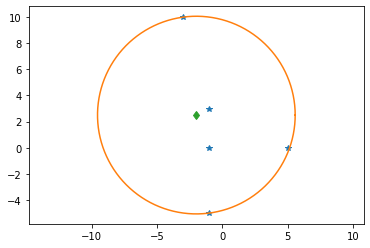

In [34]:
ax = plt.figure(1)
plt.plot(A[:, 0],A[:, 1],'*')
t = np.linspace(0, 2 * np.pi, num = 1000)
plt.plot(x.value[0] + r.value*np.cos(t), x.value[1] + r.value*np.sin(t))
plt.plot(x.value[0], x.value[1], 'd')
plt.axis('equal')
plt.show()

# Example 8.20
### robust regression

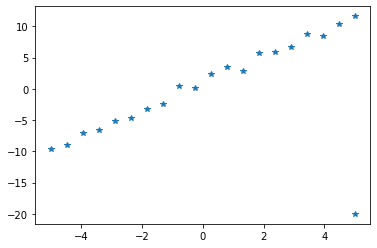

In [35]:
import numpy as np
import numpy.linalg as la
import cvxpy as cap
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, num = 20)
eps = np.sin(10 * np.arange(1, 21) ** 3)
y = 2 * x + 1 + eps
x = np.hstack([x, 5])
y = np.hstack([y, -20])
plt.plot(x,y,'*')
plt.show()

/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/1050310140.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  u = la.lstsq(A, b)[0]


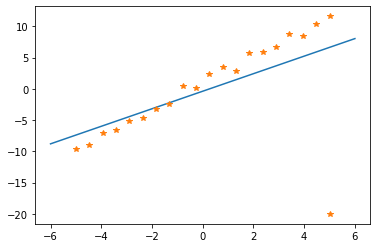

In [36]:
A = np.hstack([x.reshape((21, 1)), np.ones((21, 1))])
b=y
u = la.lstsq(A, b)[0]
alpha = u[0]; beta = u[1]
plt.plot(np.array([-6,6]),alpha*np.array([-6,6])+beta)
plt.plot(x,y,'*')
plt.show()

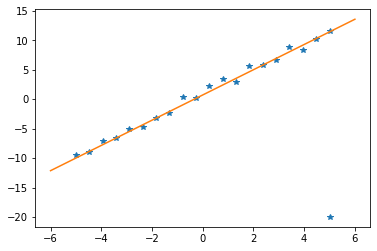

In [37]:
plt.plot(x,y,'*')
u_l1 = cp.Variable(2)
prob = cp.Problem(cp.Minimize(cp.norm(A @ u_l1 - b,1)))
prob.solve()
alpha = u_l1.value[0]; beta = u_l1.value[1]
plt.plot(np.array([-6,6]),alpha*np.array([-6,6])+beta)

# Example 8.21
### trust region subproblem

In [38]:
import numpy as np
import numpy.linalg as la
A = np.array([[1, 2, 3], [2, 1, 4], [3, 4, 3]])
b = 0.5 * np.array([1, 2, -1])
d, U = la.eigh(A)
print(d)
f = U.T @ b

[-2.1683478  -0.80932486  7.97767266]


In [39]:
import cvxpy as cp
z = cp.Variable(3)
objective = cp.Minimize(d.T @ z -2 * np.abs(f).T @ cp.sqrt(z))
constraints = [cp.sum(z)<=1, z>=0]
prob = cp.Problem(objective, constraints)
opt_val = prob.solve()
y = -np.sign(f) * np.sqrt(z.value)
x=U@y
print(x)

[-0.23004067 -0.72589557  0.64819512]


# Section 11.4 
### Bisection

In [40]:
def bisection(f, lb, ub, eps):
    assert f(lb)*f(ub)<=0, "f(lb)*f(ub)>0"
    iter = 0
    while ub-lb>eps:
        z = 0.5 * (lb + ub)
        iter = iter + 1
        if f(lb)*f(z)>0:
            lb = z
        else:
            ub = z
        print('iter_number = {0:2d}'.format(iter),\
              'current_sol = {0:.8f}'.format(z))
    return z

In [41]:
f = lambda x : x**2 -2
bisection(f,1,2,1e-4)

iter_number =  1 current_sol = 1.50000000
iter_number =  2 current_sol = 1.25000000
iter_number =  3 current_sol = 1.37500000
iter_number =  4 current_sol = 1.43750000
iter_number =  5 current_sol = 1.40625000
iter_number =  6 current_sol = 1.42187500
iter_number =  7 current_sol = 1.41406250
iter_number =  8 current_sol = 1.41796875
iter_number =  9 current_sol = 1.41601562
iter_number = 10 current_sol = 1.41503906
iter_number = 11 current_sol = 1.41455078
iter_number = 12 current_sol = 1.41430664
iter_number = 13 current_sol = 1.41418457
iter_number = 14 current_sol = 1.41424561


1.41424560546875

# Constrained least squares 

In [42]:
def cls(A, b, alpha):
    n = A.shape[1]
    x_ls = la.lstsq(A, b)[0]
    if (la.norm(x_ls)**2) <= alpha:
        x_cls = x_ls
    else:
        ATA = A.T @ A
        ATb = A.T @ b
        f = lambda lam : la.norm(la.solve(ATA + lam*np.eye(n),ATb))**2\
        -alpha
        u=1
        while f(u) > 0:
            u=2*u
        lam = bisection(f, 0, u, 1e-7)
        x_cls = la.solve(ATA + lam * np.eye(n),ATb)
    return x_cls

In [43]:
A = np.array([[1, 2], [3, 1], [2, 3]])
b = np.array([2, 3, 4])
x_ls = la.lstsq(A, b)[0]
print(x_ls)
print(la.norm(x_ls)**2)

[0.76 0.76]
1.1552000000000004


/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/3896954945.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_ls = la.lstsq(A, b)[0]


In [44]:
x_cls = cls(A,b,1.5)
print(x_cls)

[0.76 0.76]


/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/2147771450.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_ls = la.lstsq(A, b)[0]


In [45]:
x_cls = cls(A,b,0.5)
print(x_cls)

iter_number =  1 current_sol = 8.00000000
iter_number =  2 current_sol = 12.00000000
iter_number =  3 current_sol = 14.00000000
iter_number =  4 current_sol = 13.00000000
iter_number =  5 current_sol = 13.50000000
iter_number =  6 current_sol = 13.25000000
iter_number =  7 current_sol = 13.12500000
iter_number =  8 current_sol = 13.06250000
iter_number =  9 current_sol = 13.03125000
iter_number = 10 current_sol = 13.01562500
iter_number = 11 current_sol = 13.00781250
iter_number = 12 current_sol = 13.00390625
iter_number = 13 current_sol = 13.00195312
iter_number = 14 current_sol = 13.00097656
iter_number = 15 current_sol = 13.00048828
iter_number = 16 current_sol = 13.00024414
iter_number = 17 current_sol = 13.00012207
iter_number = 18 current_sol = 13.00006104
iter_number = 19 current_sol = 13.00003052
iter_number = 20 current_sol = 13.00001526
iter_number = 21 current_sol = 13.00000763
iter_number = 22 current_sol = 13.00000381
iter_number = 23 current_sol = 13.00000191
iter_number 

/var/folders/73/36k_gn956510kr_5dqxq96140000gn/T/ipykernel_32538/2147771450.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_ls = la.lstsq(A, b)[0]


In [46]:
import cvxpy as cp
x_cp = cp.Variable(2)
obj = cp.Minimize(cp.norm(A @ x_cp - b))
con = [cp.norm(x_cp) <= np.sqrt(0.5)]
prob = cp.Problem(obj,con)
prob.solve()
print(x_cp.value)

[0.5 0.5]


# Trust region subproblem (Section 11.6)

In [47]:
def trs(A,b,alpha):
    n = len(b)
    f = lambda lam : la.norm(la.solve(A + lam * np.eye(n), b))**2 - alpha
    try:
        L = la.cholesky(A)
        x_naive = -la.solve(L.T, la.solve(L, b))
        if la.norm(x_naive)**2 <= alpha:
            x_trs = x_naive
        else:
            u=1
            while f(u) > 0:
                u=2*u
        lam = bisection(f, 0, u, 1e-7)
        x_trs = -la.solve(A + lam * np.eye(n), b)
    except:
        u = 1;
        while f(u) > 0: u=2*u
        w,v=la.eigh(A)
        lam = bisection(f, -np.min(w) + 1e-7, u, 1e-7)
        x_trs=-la.solve(A + lam * np.eye(n), b)
    return x_trs

In [48]:
import numpy as np
import numpy.linalg as la
A = np.array([[1, 2, 3],[2, 1, 4],[3, 4, 3]])
b = np.array([0.5, 1, -0.5])
x_trs = trs(A, b, 1)
print(x_trs)


iter_number =  1 current_sol = 3.08417395
iter_number =  2 current_sol = 3.54208698
iter_number =  3 current_sol = 3.31313046
iter_number =  4 current_sol = 3.42760872
iter_number =  5 current_sol = 3.37036959
iter_number =  6 current_sol = 3.34175003
iter_number =  7 current_sol = 3.32744025
iter_number =  8 current_sol = 3.32028536
iter_number =  9 current_sol = 3.31670791
iter_number = 10 current_sol = 3.31491919
iter_number = 11 current_sol = 3.31581355
iter_number = 12 current_sol = 3.31536637
iter_number = 13 current_sol = 3.31558996
iter_number = 14 current_sol = 3.31570175
iter_number = 15 current_sol = 3.31564586
iter_number = 16 current_sol = 3.31561791
iter_number = 17 current_sol = 3.31560393
iter_number = 18 current_sol = 3.31559695
iter_number = 19 current_sol = 3.31560044
iter_number = 20 current_sol = 3.31559869
iter_number = 21 current_sol = 3.31559957
iter_number = 22 current_sol = 3.31559913
iter_number = 23 current_sol = 3.31559891
iter_number = 24 current_sol = 3.3

# Example 12.14 
### projection onto a polytope

In [49]:
import numpy as np
import numpy.linalg as la
def proj_polytope(y, A, b, N):
    m, n = A.shape
    lam = np.zeros((m, ))
    L = 2 * la.norm(A, 2)**2
    g = A @ y - b
    for k in range(N):
        lam = lam + 2.0/L * (-A @ (A.T @ lam) + g)
        lam = np.maximum(lam, 0)
    return y - A.T @ lam


A = np.array([[1, 1], [-1, 0], [0, -1]])
b = np.array([1, 0 ,0])
y = np.array([2, -1])
x = proj_polytope(y, A, b, 100)
print(x)

[ 1.00000143e+00 -8.80856607e-07]


In [50]:
x = proj_polytope(y, A, b, 5)
print(x)

[ 1.59259259 -0.36625514]


# Section 12.3.6 
### projection onto the unit-simplex

In [51]:
import numpy as np
def proj_unit_simplex(y):
    f = lambda lam : np.sum(np.maximum(y - lam, 0)) - 1
    n = len(y)
    lb = np.min(y)- 2.0 / n
    ub = np.max(y)
    lam = bisection(f, lb, ub, 1e-10)
    return np.maximum(y - lam, 0)

y = np.array([-1,1,0.3])
xp = proj_unit_simplex(y)
print(xp)

iter_number =  1 current_sol = -0.33333333
iter_number =  2 current_sol = 0.33333333
iter_number =  3 current_sol = 0.00000000
iter_number =  4 current_sol = 0.16666667
iter_number =  5 current_sol = 0.08333333
iter_number =  6 current_sol = 0.12500000
iter_number =  7 current_sol = 0.14583333
iter_number =  8 current_sol = 0.15625000
iter_number =  9 current_sol = 0.15104167
iter_number = 10 current_sol = 0.14843750
iter_number = 11 current_sol = 0.14973958
iter_number = 12 current_sol = 0.15039063
iter_number = 13 current_sol = 0.15006510
iter_number = 14 current_sol = 0.14990234
iter_number = 15 current_sol = 0.14998372
iter_number = 16 current_sol = 0.15002441
iter_number = 17 current_sol = 0.15000407
iter_number = 18 current_sol = 0.14999390
iter_number = 19 current_sol = 0.14999898
iter_number = 20 current_sol = 0.15000153
iter_number = 21 current_sol = 0.15000025
iter_number = 22 current_sol = 0.14999962
iter_number = 23 current_sol = 0.14999994
iter_number = 24 current_sol = 0.

In [52]:
import cvxpy as cp
x = cp.Variable(3)
obj = cp.Minimize(cp.norm(x - y))
con = [cp.sum(x) == 1, x>=0]
prob = cp.Problem(obj,con)
prob.solve()
print(x.value)

[1.47772423e-11 8.50009289e-01 1.49990711e-01]


# Section 12.3.7
### dual of the Chebyshev center

In [53]:
import numpy as np
import numpy.linalg as la
def chebyshev_center(A):
    m = A.shape[1]
    Q = A.T @ A
    L = 2.0 * la.norm(A, 2)**2
    b = np.sum(A**2, axis = 0)
    lam = 1.0 / m * np.ones((m,))
    old_lam = np.zeros((m,))
    while la.norm(lam - old_lam) > 1e-5:
        old_lam = np.copy(lam)
        lam = proj_unit_simplex(lam + 1.0 / L *(-2 * Q @ lam + b))
    xp = A @ lam
    r=0
    for i in range(m):
        r = np.maximum(r,la.norm(xp - A[:, i]))
    return xp, r

In [54]:
A = np.array([[-1, -3, -1, 5, -1],\
              [3, 10, 0, 0, -5]])
xp, r=chebyshev_center(A)

iter_number =  1 current_sol = 0.13392015
iter_number =  2 current_sol = -0.03303993
iter_number =  3 current_sol = 0.05044011
iter_number =  4 current_sol = 0.09218013
iter_number =  5 current_sol = 0.11305014
iter_number =  6 current_sol = 0.10261513
iter_number =  7 current_sol = 0.09739763
iter_number =  8 current_sol = 0.10000638
iter_number =  9 current_sol = 0.10131076
iter_number = 10 current_sol = 0.10196295
iter_number = 11 current_sol = 0.10228904
iter_number = 12 current_sol = 0.10245209
iter_number = 13 current_sol = 0.10253361
iter_number = 14 current_sol = 0.10249285
iter_number = 15 current_sol = 0.10247247
iter_number = 16 current_sol = 0.10246228
iter_number = 17 current_sol = 0.10246737
iter_number = 18 current_sol = 0.10246992
iter_number = 19 current_sol = 0.10247120
iter_number = 20 current_sol = 0.10247183
iter_number = 21 current_sol = 0.10247215
iter_number = 22 current_sol = 0.10247199
iter_number = 23 current_sol = 0.10247191
iter_number = 24 current_sol = 0.

iter_number = 15 current_sol = 0.16607363
iter_number = 16 current_sol = 0.16605688
iter_number = 17 current_sol = 0.16604851
iter_number = 18 current_sol = 0.16605269
iter_number = 19 current_sol = 0.16605479
iter_number = 20 current_sol = 0.16605583
iter_number = 21 current_sol = 0.16605636
iter_number = 22 current_sol = 0.16605610
iter_number = 23 current_sol = 0.16605623
iter_number = 24 current_sol = 0.16605629
iter_number = 25 current_sol = 0.16605633
iter_number = 26 current_sol = 0.16605634
iter_number = 27 current_sol = 0.16605635
iter_number = 28 current_sol = 0.16605635
iter_number = 29 current_sol = 0.16605636
iter_number = 30 current_sol = 0.16605636
iter_number = 31 current_sol = 0.16605635
iter_number = 32 current_sol = 0.16605635
iter_number = 33 current_sol = 0.16605636
iter_number = 34 current_sol = 0.16605636
iter_number =  1 current_sol = 0.11713410
iter_number =  2 current_sol = 0.39160398
iter_number =  3 current_sol = 0.25436904
iter_number =  4 current_sol = 0.1

In [55]:
print(xp, r)

[-2.00000089  2.50000667] 7.566379702504551


# Section 12.3.10
### denoising 

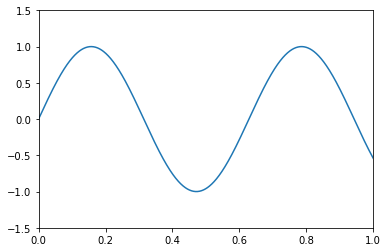

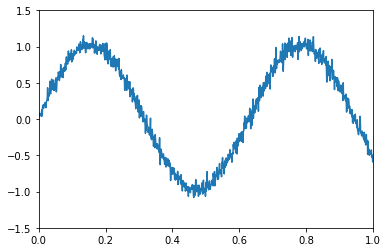

In [56]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
n=1000
t = np.linspace(0, 1, num = n)
x = np.sin(10 * t)
plt.plot(t, x)
plt.axis([0, 1, -1.5, 1.5])
plt.show()
u1=.5*np.sin(27*np.arange(1,n+1)**3)+.5
u2=.5*np.cos(13*np.arange(1,n+1)**3)+.5
a = 2 * np.pi
w=np.sqrt(-2*np.log(u1))*np.cos(a*u2)
y = x + 0.05 * w
plt.plot(t,y)
plt.axis([0, 1, -1.5, 1.5])
plt.show()

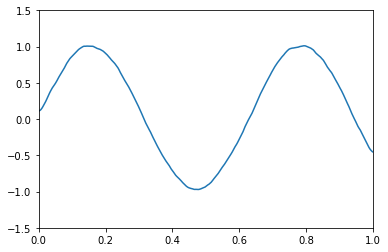

In [57]:
L = np.zeros((n-1, n))
for i in range(n-1):
    L[i, i] = 1
    L[i, i+1] = -1
lam = 100
xde = la.solve(np.eye(n) + lam * L.T @ L, y)
plt.plot(t, xde)
plt.axis([0, 1, -1.5, 1.5])
plt.show()

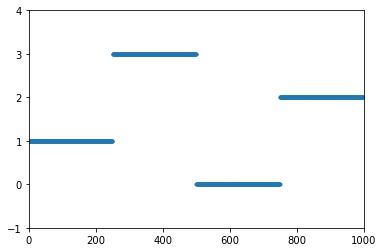

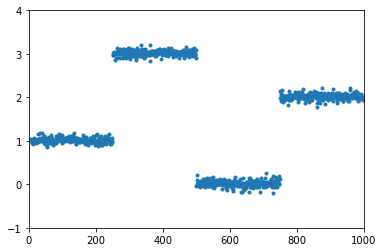

In [58]:
x = np.zeros((n,))
x[0:250] = 1
x[250:500] = 3
x[750:1000] = 2
plt.plot(x,'.')
plt.axis([0, n, -1, 4])
plt.show()
u1=.5*np.sin(27*np.arange(1,n+1)**3)+.5
u2=.5*np.cos(13*np.arange(1,n+1)**3)+.5
a = 2 * np.pi
w=np.sqrt(-2*np.log(u1))*np.cos(a*u2)
y = x + 0.05 * w
plt.plot(y, '.')
plt.axis([0, n, -1, 4])
plt.show()

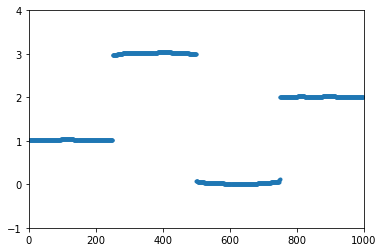

In [59]:
lam = 1
mu = np.zeros((n-1, ))
for i in range(1000):
    mu += -0.25 * L @ (L.T @ mu) + 0.5 * (L @ y)
    d = np.maximum(np.abs(mu), lam)
    mu = lam * mu / d
xde = y - 0.5 * L.T @ mu
plt.plot(xde, '.')
plt.axis([0, n, -1, 4])
plt.show()
